In [1]:
!pip install -q --no-cache-dir --upgrade git+https://github.com/tumido/face_biometrics_descriptor-code.git
  
from sklearn.datasets import fetch_lfw_people
from capsnet import preprocess, CapsNet

Using TensorFlow backend.


In [2]:
# Visualize
import numpy as np
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

# Auxilary
import os
from random import randint

# Load widgets
!pip install -q ipywidgets
import ipywidgets as widgets

# Mount Google Drive
from google.colab import files
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
people = fetch_lfw_people(
        color=True,
        min_faces_per_person=50
    )


data = preprocess(people)
(x_train, y_train), (x_test, y_test) = data

In [4]:
model_file = widgets.Dropdown(options=os.listdir('/content/gdrive/My Drive/models'))
model_file

Dropdown(options=('2019-05-14_42caps_48acc.tar.gz', '2019-05-13_42caps_42acc.tar.gz', '2019-05-14_42caps_43acc…

In [5]:
model, _ = CapsNet.load(f'/content/gdrive/My Drive/models/{model_file.value}')
model.summary()

Loading model from /content/gdrive/My Drive/models/2019-05-14_11-caps_75-acc.tar.gz...
	Loading "train" architecture... WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Done
	Loading "test" architecture... Done
	Loading weights... Done
	Extracting labels... Done
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        (None, 32, 32, 3)    0                                            
________________________________________________________________________________

In [6]:
import gc
gc.collect()

0

In [7]:
metrics = model.test(x_test, y_test)
pd.DataFrame.from_dict(metrics, columns=["Value"], orient='index')

312/312 [==============================] - 3s 10ms/step


,Value
loss,0.201294
acc,0.737179


In [0]:
predictions = model.predict(x_test)
bins = len(np.unique(y_train, axis=0))

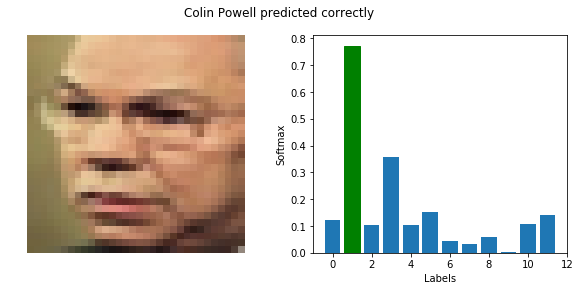

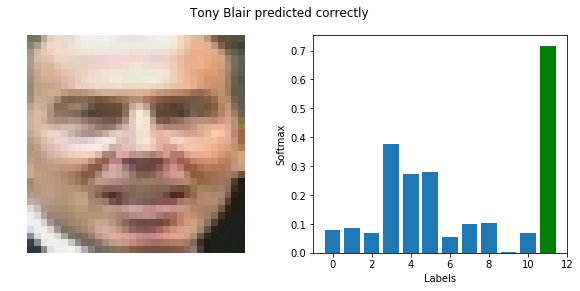

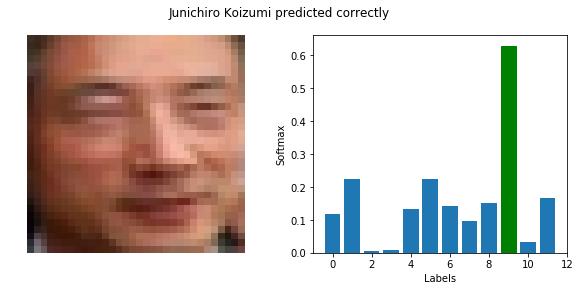

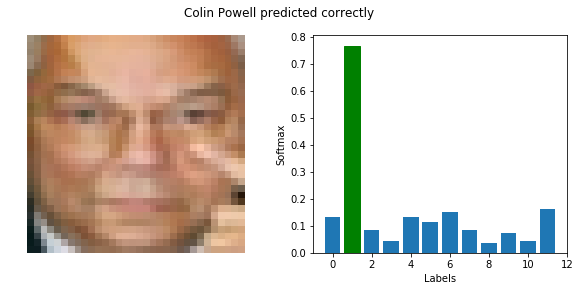

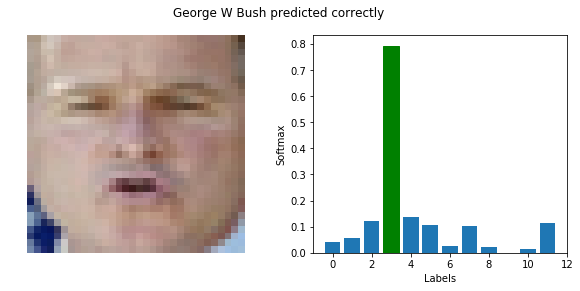

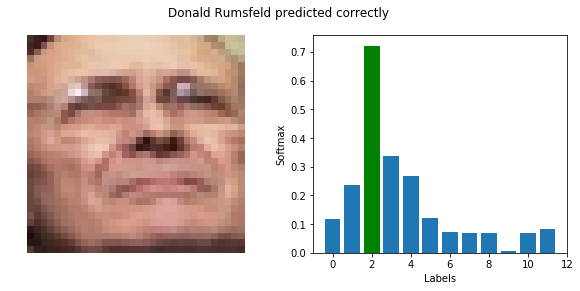

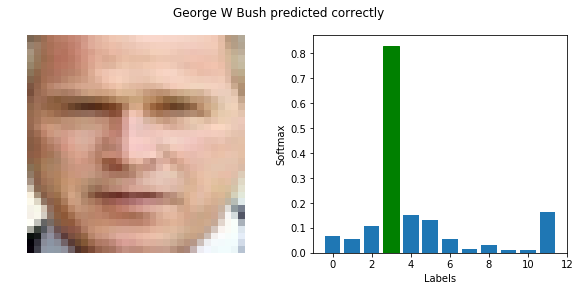

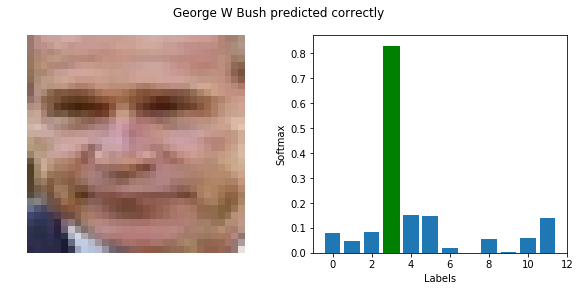

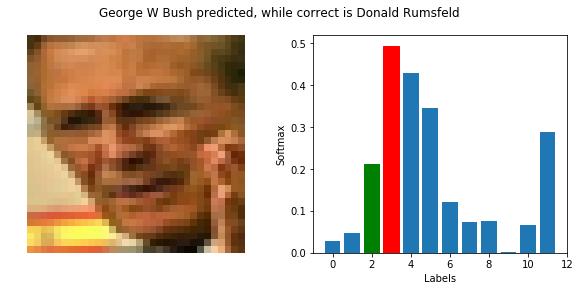

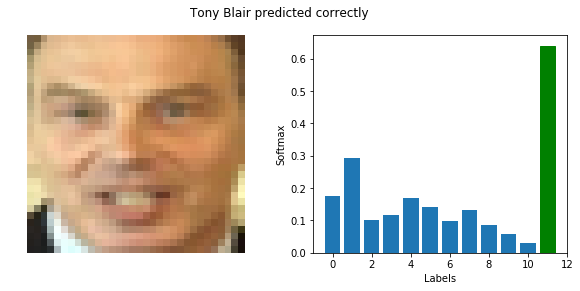

In [9]:
for j in range(10):
    i = randint(0, len(x_test))
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    fig.subplots_adjust(hspace=1)
    axs = axs.ravel()
    predicted_idx = np.argmax(predictions[i])
    real_idx = np.argmax(y_test[i])

    axs[0].axis('off')
    axs[0].imshow(x_test[i])
    predicted_name = people.target_names[predicted_idx]
    real_name = people.target_names[real_idx]

    bars = axs[1].bar(np.arange(bins), predictions[i])
    axs[1].set_ylabel("Softmax")
    axs[1].set_xlabel("Labels")
    bars[predicted_idx].set_color('r')
    bars[real_idx].set_color('g')
    if predicted_idx == real_idx:
        fig.suptitle("%s predicted correctly" % predicted_name)
    else:
        fig.suptitle("%s predicted, while correct is %s" % (predicted_name, real_name))

plt.show()

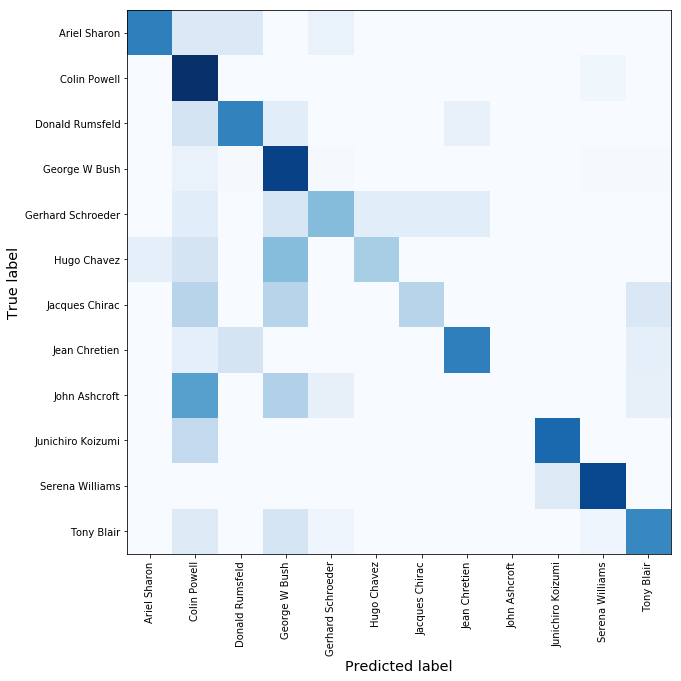

In [10]:
def plot_confusion_matrix(cm, classes, cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    tick_marks = np.arange(0, len(classes), 1)
    plt.xticks(tick_marks, classes[tick_marks], rotation=90)
    plt.yticks(tick_marks, classes[tick_marks])
    plt.ylabel('True label', fontsize='x-large')
    plt.xlabel('Predicted label', fontsize='x-large')

y_pred = np.argmax(predictions, axis=1)
plt.figure(figsize=(10, 10))
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm, classes=people.target_names)
plt.grid(False)

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


average accuracy: 59.6%


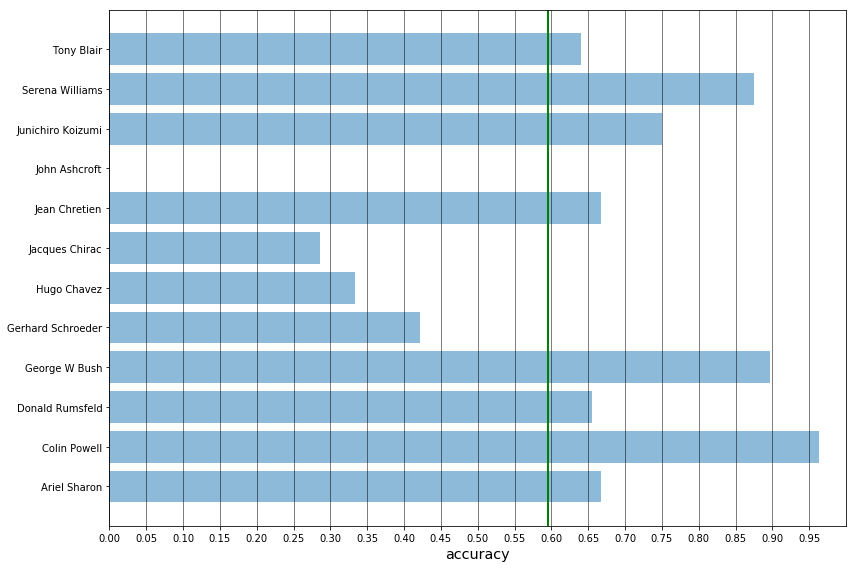

In [11]:
def plot_barh(labels, values):
    fig = plt.figure(figsize=(12, 8))
    y_pos = np.arange(len(labels))
    plt.barh(y_pos, values, align='center', alpha=0.5)
    plt.yticks(y_pos, labels)
    plt.xticks(np.arange(0.0, 1.0, 0.05))
    plt.xlabel('accuracy', fontsize='x-large')
    plt.axes().xaxis.grid(color='black', linestyle='-', linewidth=0.5)
    axes = plt.gca()
    axes.set_xlim([0.0, 1.0])
    axes.axvline(np.mean(values), color='green', linewidth=2)
    plt.tight_layout()
    
class_accuracies = [cm[i, i] for i in range(cm.shape[0])]
plot_barh(people.target_names, class_accuracies)
print('average accuracy: {}%'.format(np.round(np.mean(class_accuracies) * 100.0, 1)))